Looking at how we'll actually be calculating the turnaround point. Thinking of just going to find the first non-zero toa_efficiency for each channel as a crude start. First, let's plot the same data from trim_toa_efficiency.py, but just toa no efficiency.

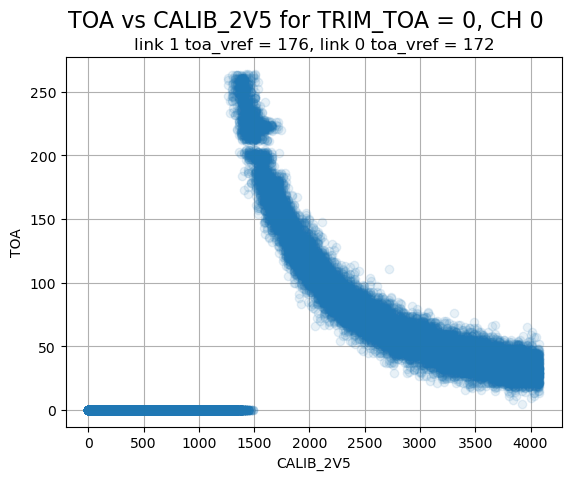

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(
    'leveled-trim-toa-scan.csv',
    skiprows = 1)

# separate the data into unique trim_toa values
unique_trim_toas = data['TRIM_TOA'].unique()
trim = unique_trim_toas[0]
trim_toa_now = data[data['TRIM_TOA'] == trim]
unique_calibs = trim_toa_now['CALIB_2V5'].unique()
for chan in range(1):
    toa_efficiency = []
    for calib in unique_calibs:
        calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
        # count the number of non-zero TOA values for this channel
        non_zeros = calibs[calibs[str(chan)] != 0]
        chan_triggers = len(non_zeros)
        chan_toa_efficiency = chan_triggers / len(calibs)
        toa_efficiency.append(chan_toa_efficiency)
    # plt.plot(unique_calibs, toa_efficiency, label=f'CH {chan}')
    plt.plot(trim_toa_now['CALIB_2V5'], trim_toa_now['0'], linestyle = 'none', marker = 'o', alpha = .1)
plt.xlabel('CALIB_2V5')
# plt.ylabel('TOA Efficiency')
plt.ylabel('TOA')
plt.suptitle(f'TOA vs CALIB_2V5 for TRIM_TOA = {trim}, CH 0', size=16)
plt.title('link 1 toa_vref = 176, link 0 toa_vref = 172')
plt.grid()
# plt.legend()
plt.savefig(f'toa_efficiency_TRIM_TOA_{trim}.png')
plt.show()

# plt.close()  # close the plot to avoid displaying it immediately

Printing the toa_efficiency and unique_calibs lets us see where the first non-zero value of toa_efficiency is coming. We can get the index if we 


In [2]:
# print(np.array(toa_efficiency))
# print(unique_calibs)

for i in range(len(toa_efficiency)):
    if toa_efficiency[i] != 0.0:
        val = i
        break
print(f"trim_toa is {trim}\ncalib is {unique_calibs[val]}\nat first non-zero toa_efficiency {val}")

trim_toa is 0
calib is 1264
at first non-zero toa_efficiency 79


In [3]:
# now loop it for each channel, since we want this for each channel and trim_toa value combination.
# separate the data into unique trim_toa values
unique_trim_toas = data['TRIM_TOA'].unique()
trim = unique_trim_toas[0]
trim_toa_now = data[data['TRIM_TOA'] == trim]
unique_calibs = trim_toa_now['CALIB_2V5'].unique()
for chan in range(5):
    toa_efficiency = []
    for calib in unique_calibs:
        calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
        # count the number of non-zero TOA values for this channel
        non_zeros = calibs[calibs[str(chan)] != 0]
        chan_triggers = len(non_zeros)
        chan_toa_efficiency = chan_triggers / len(calibs)
        toa_efficiency.append(chan_toa_efficiency)
    for i in range(len(toa_efficiency)):
        if toa_efficiency[i] != 0.0:
            val = i
            break
    print(f"trim_toa is {trim}\ncalib is {unique_calibs[val]}\nat first non-zero toa_efficiency {val} for channel {chan}")

trim_toa is 0
calib is 1264
at first non-zero toa_efficiency 79 for channel 0
trim_toa is 0
calib is 2640
at first non-zero toa_efficiency 165 for channel 1
trim_toa is 0
calib is 2640
at first non-zero toa_efficiency 165 for channel 2
trim_toa is 0
calib is 480
at first non-zero toa_efficiency 30 for channel 3
trim_toa is 0
calib is 800
at first non-zero toa_efficiency 50 for channel 4


In [ ]:
# now that we can get the data, we need to store it into an array for later use
# need columns for trim_toa, calib, channel, that's it
# start with a numpy array and then convert to pandas DataFrame, since that's more efficient
# initialize the empty array with correct shape

array = np.array([], dtype = 'int').reshape(0, 3)  # empty array with 3 columns

# append new data to array every iteration of the loop
unique_trim_toas = data['TRIM_TOA'].unique()
for trim in unique_calibs:
    trim_toa_now = data[data['TRIM_TOA'] == trim]
    unique_calibs = trim_toa_now['CALIB_2V5'].unique()
    for chan in range(72):
        toa_efficiency = []
        for calib in unique_calibs:
            calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
            # count the number of non-zero TOA values for this channel
            non_zeros = calibs[calibs[str(chan)] != 0]
            chan_triggers = len(non_zeros)
            chan_toa_efficiency = chan_triggers / len(calibs)
            toa_efficiency.append(chan_toa_efficiency)
        for i in range(len(toa_efficiency)):
            if toa_efficiency[i] != 0.0:
                val = i
                break
        # append the data to the array
        new_row = np.array([[trim, unique_calibs[val], chan]])
        array = np.concatenate((array, new_row), axis = 0)
# but this takes like 7 seconds. And it throws an error when the last list is empty since it doesn't match dimensions. So let's find a faster way.
print(array)

IndexError: index 107 is out of bounds for axis 0 with size 0

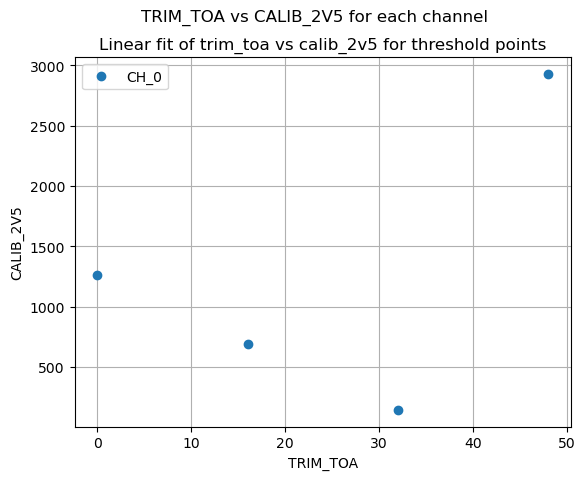

In [ ]:
# now that we have the data, we could convert it to a pandas DataFrame
# or, we can just plot directly from the array, looping over the channels

plt.figure()
for chan in range(1):
    chan_data = array[array[:, 2] == chan] # picks out the third column
    plt.plot(chan_data[:, 0], chan_data[:, 1], linestyle = 'none', marker = 'o', label = 'CH_'+str(chan))
    # adc = (df[str(channel)].to_numpy())
    # trim_inv = (df['TRIM_INV']).to_numpy()
    # slope, offset, r_value, p_value, slope_err = lr(trim_inv, adc)
    # stats.loc[len(stats)] = [channel, slope, offset]
plt.ylabel('CALIB_2V5')
plt.xlabel('TRIM_TOA')
plt.suptitle('TRIM_TOA vs CALIB_2V5 for each channel')
plt.title('Linear fit of trim_toa vs calib_2v5 for threshold points')
plt.grid()
plt.legend()
plt.savefig('trim_toa_vs_calib_per_channel_lines.png')
plt.show()

# Goal is to see a descending line for each channel. But I'm kinda not seeing that yet.